In [1]:
import os
import gzip
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load data

* **Source**: [BG-PoS-dataset](https://www.kaggle.com/datasets/auhide/bulgarian-part-of-speech-dataset4)

In [2]:
# Read the csv file in the gzip archive
words_df = pd.read_csv('data/2_bg_pos_dataset.csv.gz', encoding='windows-1251', sep='\t', compression='gzip')
words_df.index.name = 'id'
print(f"Total words count: {len(words_df):,}")
words_df.head(10)

Total words count: 1,348,102


,word,lemma,form,pos
id,,,,
0,а,а,основна форма,съюз
1,а,а,основна форма,съюз
2,аба,аба,основна форма,съществително име
3,аба,аба,ед.ч.,съществително име
4,абата,аба,"ед.ч., членувано",съществително име
5,аби,аба,мн.ч.,съществително име
6,абите,аба,"мн.ч., членувано",съществително име
7,Абаджиев,Абаджиев,основна форма,фамилно име или презиме
8,Абаджиев,Абаджиев,мъжко,фамилно име или презиме


* **OBSERVATION**: Expectly, we observe names and duplicates.

## 2. Remove spaced words

In [3]:
spaced_words = words_df[words_df['word'].str.contains(" ")]
print(f"Number of spaced words: {len(spaced_words):,}")

Number of spaced words: 0


* **OBSERVATION**: No spaced words in this dataset.

## 3. Remove dashed words

In [4]:
dashed_words = words_df[words_df['word'].str.contains("-")]
print(f"Number of dashed words: {len(dashed_words):,}")

Number of dashed words: 0


* **OBSERVATION**: No dashed words as well.

## 4. Remove capitalized words (names)

In [5]:
# Extract all names that start with a capital letter
names_df = words_df[words_df['word'].str.match(r'^[А-Я]')]
print(f"Number of names: {len(names_df):,}")
names_df.sample(10)

Number of names: 9,023


,word,lemma,form,pos
id,,,,
1296722,Филева,Филев,женско,фамилно име или презиме
444544,Кристияна,Кристияна,основна форма,лично име
1242142,Тончо,Тончо,мъжко,лично име
539796,Налбантов,Налбантов,основна форма,фамилно име или презиме
142982,Дишлиев,Дишлиев,основна форма,фамилно име или презиме
1121787,Рускова,Русков,женско,фамилно име или презиме
736601,Панайотов,Панайотов,основна форма,фамилно име или презиме
742210,Пейчо,Пейчо,мъжко,лично име
38977,Богоева,Богоев,женско,фамилно име или презиме


In [6]:
# Remove words that start with a capital letter
words_df = words_df[~words_df['word'].str.match(r'^[А-Я]')]
print(f"Total words count (after removing names): {len(words_df):,}")

Total words count (after removing names): 1,339,079


## 5. Check 1-letter words

In [7]:
# One letter words
one_letter_words = words_df[words_df['word'].str.len() == 1]
print(f"Number of one letter words: {len(one_letter_words):,}")
print(sorted(one_letter_words['word'].tolist()))

Number of one letter words: 24
['а', 'а', 'в', 'е', 'е', 'е', 'е', 'е', 'и', 'и', 'и', 'и', 'и', 'и', 'и', 'о', 'о', 'с', 'у', 'я', 'я', 'я', 'я', 'я']


* **OBSERVATION**: Everything looks good here (except for the duplicates, which in our case are not needed)

## 6. Check 2-letter words

In [8]:
# Two letter words
two_letter_words = words_df[words_df['word'].str.len() == 2]
print(f"Number of two letter words: {len(two_letter_words):,}")
# Print all the 2-letter words
print(sorted(two_letter_words['word'].tolist()))

Number of two letter words: 265
['ад', 'ад', 'аз', 'аз', 'аз', 'аз', 'ай', 'ар', 'ар', 'ас', 'ас', 'ат', 'ат', 'ат', 'ат', 'ах', 'ба', 'бе', 'би', 'би', 'би', 'би', 'би', 'би', 'би', 'би', 'би', 'ви', 'ви', 'ви', 'ви', 'ви', 'ви', 'ви', 'ви', 'ви', 'ви', 'ви', 'вя', 'вя', 'вя', 'вя', 'вя', 'вя', 'ги', 'го', 'го', 'го', 'го', 'да', 'да', 'де', 'до', 'ду', 'ду', 'ду', 'ду', 'ду', 'ду', 'ду', 'ду', 'ду', 'ду', 'еж', 'еж', 'еж', 'еж', 'ей', 'ек', 'ек', 'ек', 'ек', 'ех', 'за', 'зя', 'зя', 'из', 'им', 'им', 'ки', 'ле', 'ли', 'ля', 'ля', 'ля', 'ля', 'ма', 'ме', 'ме', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'ми', 'му', 'му', 'му', 'му', 'му', 'му', 'му', 'на', 'на', 'не', 'ни', 'ни', 'ни', 'ни', 'ни', 'ни', 'ни', 'ни', 'ни', 'но', 'ой', 'ок', 'ок', 'ок', 'ок', 'ос', 'ос', 'от', 'ох', 'па', 'па', 'пи', 'пи', 'пи', 'пи', 'пи', 'пи', 'по', 'пя', 'пя', 'пя', 'пя', 'пя', 'пя', 'ри', 'ри', 'ри', 'ри', 'ря', 'ря', 'са', 'са', 'са', '

* **OBSERVATION**: Few words looked suspicious (e.g. `ки`), but IBS BAS dictionary confirmed they are valid words.

## 7. Remove Latin symbols

In [9]:
# Print words that contain latin symbols
latin_words = words_df[words_df['word'].str.contains(r'[a-zA-Z]')]
print(f"Number of words with latin symbols: {len(latin_words):,}")

Number of words with latin symbols: 0


## 8. Remove punctuation & digits

In [10]:
# Is there words with anything different than letters?
words_df[words_df['word'].str.contains(r'[^\w]')]

,word,lemma,form,pos
id,,,,


* **OBSERVATION**: No spaces, no dashes, no punctuation, no digits, no latin symbols. Wow, great dataset!

## 9. Remove duplicates

In [11]:
# Remove duplicated words
words_df = words_df.drop_duplicates(subset=['word'])
print(f"Total words count (after removing duplicates): {len(words_df):,}")

Total words count (after removing duplicates): 857,510


## 10. Length distribution

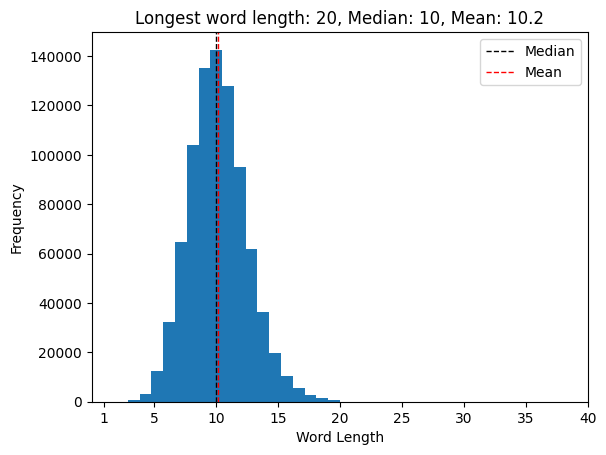

In [12]:
word_lengths = words_df['word'].str.len()
mean_length = word_lengths.mean()
median_length = word_lengths.median()
word_longest = word_lengths.max()
plt.hist(word_lengths, bins=word_longest)
plt.axvline(median_length, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1)
plt.legend(['Median', 'Mean'])
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title(f'Longest word length: {word_longest}, Median: {median_length:.0f}, Mean: {mean_length:.1f}')
plt.xticks([1, 5, 10, 15, 20, 25, 30, 35, 40])
plt.xlim(0, 40)
plt.show()

* **OBSERVATION**: The `median` and `mean` values are almost identical to the ones in the `Chitanka` dataset. However, the longest word is twice shorter (20 letters vs 40 letters).

Maybe the author of the current set hasn't heard about the notoriously famous Bulgarian word `непротивоконституционствувателствувалият` :)

In [13]:
# Print the longest words
twenty_letter_words = words_df[words_df['word'].str.len() == 20]
print(f"Number of 20-letter words: {len(twenty_letter_words):,}")
twenty_letter_words.sample(20)

Number of 20-letter words: 728


,word,lemma,form,pos
id,,,,
614973,нечленоразделностите,нечленоразделност,"мн.ч., членувано",съществително име
824512,покровителствуващият,покровителствувам,"сег.деят.прич., ед.ч., м.р., пълен член",глагол
444534,кристалоструктурните,кристалоструктурен,"мн.ч., членувано",прилагателно име
192514,животозастрашаващият,животозастрашаващ,"м.р., ед.ч., пълен член",прилагателно име
35003,благоприятствуването,благоприятствуване,"ед.ч., членувано",съществително име
604658,непрепоръчителността,непрепоръчителност,"ед.ч., членувано",съществително име
595725,некредитоспособности,некредитоспособност,мн.ч.,съществително име
11330,антимилитаристичната,антимилитаристичен,"ж.р., ед.ч., членувано",прилагателно име
824489,покровителствувалото,покровителствувам,"мин.деят.св.прич., ед.ч., ср.р., членувано",глагол


## 11. Merge with vocabulary

So far, we had `1 112 236` unique valid Bulgarian words in our vocabulary. Let's see what will be the merged set size.

In [14]:
# Read our vocabulary
vocab_df = pd.read_csv('data/words.txt.gz', encoding='windows-1251', header=None, compression='gzip')
vocab_set = set(vocab_df[0].tolist())
print(f"Number of words in the vocabulary: {len(vocab_set):,}")

Number of words in the vocabulary: 1,112,236


In [15]:
# Let's merge the two sets
bg_pos_words_set = set(words_df['word'].tolist())
print(f"Number of words in the BG_POS dataset: {len(bg_pos_words_set):,}")
merged_vocab_set = vocab_set.union(bg_pos_words_set)
print(f"Number of words in the vocabulary (after merging): {len(merged_vocab_set):,}")

Number of words in the BG_POS dataset: 857,510
Number of words in the vocabulary (after merging): 1,228,258


We have increased the total vocabulary size from `1 112 236` to `1 228 258`.

In [16]:
# Sort and dump the new vocabulary
words = sorted(list(merged_vocab_set))
with open('data/words.txt', 'w', encoding='windows-1251') as f:
    for word in words:
        f.write(word + '\n')

# Convert to gzip
with open('data/words.txt', 'rb') as f_in:
    with gzip.open('data/words.txt.gz', 'wb') as f_out:
        f_out.writelines(f_in)

# Remove the original file
os.remove('data/words.txt')

print(f"Number of words written to file: {len(words):,}")

Number of words written to file: 1,228,258
